In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load Dataset
file_path = 'data/Dataset .csv'
data = pd.read_csv(file_path)

# Display initial rows and structure
print(data.head())
print(data.info())


   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [3]:
#Descriptive Analysis
print("Statistical Summary for Numerical Columns:")
print(data.describe())

# Explore Categorical Variables
for col in ["Country Code", "City", "Cuisines"]:
    print(f"\nDistribution of {col}:")
    print(data[col].value_counts())

# Top Cuisines and Cities with Most Restaurants
top_cuisines = data["Cuisines"].value_counts().head(10)
top_cities = data["City"].value_counts().head(10)
print("\nTop Cuisines:")
print(top_cuisines)
print("\nTop Cities:")
print(top_cities)


Statistical Summary for Numerical Columns:
       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%  

Map saved as 'restaurants_map.html'.


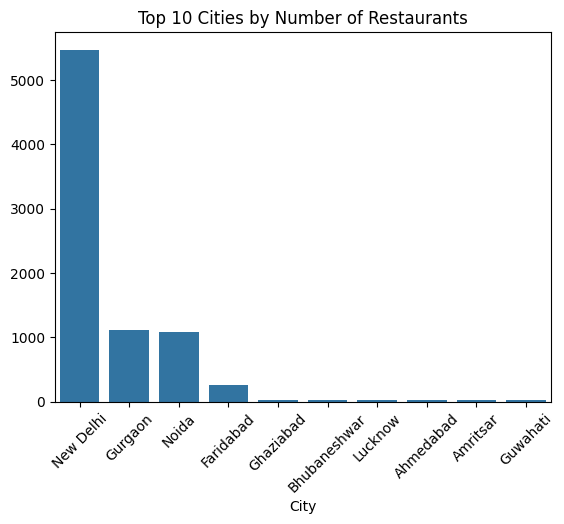


Correlation Between Location and Ratings:
                  Latitude  Longitude  Aggregate rating
Latitude          1.000000   0.043207          0.000516
Longitude         0.043207   1.000000         -0.116818
Aggregate rating  0.000516  -0.116818          1.000000


In [4]:
# Visualizing Locations on Map
map_restaurants = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=10)
for lat, lon in zip(data['Latitude'], data['Longitude']):
    folium.Marker([lat, lon]).add_to(map_restaurants)

map_restaurants.save("restaurants_map.html")
print("Map saved as 'restaurants_map.html'.")

# Analyze Distribution by Cities
city_distribution = data['City'].value_counts()
sns.barplot(x=city_distribution.head(10).index, y=city_distribution.head(10).values)
plt.title("Top 10 Cities by Number of Restaurants")
plt.xticks(rotation=45)
plt.show()

# Correlation Between Location and Ratings
print("\nCorrelation Between Location and Ratings:")
print(data[['Latitude', 'Longitude', 'Aggregate rating']].corr())


In [5]:
# Percentage of Restaurants Offering Table Booking and Online Delivery
for col in ['Has Table booking', 'Has Online delivery']:
    print(f"\nPercentage of {col}:")
    print(data[col].value_counts(normalize=True) * 100)

# Compare Ratings for Table Booking
table_booking_ratings = data.groupby('Has Table booking')['Aggregate rating'].mean()
print("\nAverage Ratings Based on Table Booking:")
print(table_booking_ratings)

# Online Delivery by Price Range
online_delivery_price = data.groupby(['Price range', 'Has Online delivery'])['Has Online delivery'].count()
print("\nOnline Delivery by Price Range:")
print(online_delivery_price)



Percentage of Has Table booking:
Has Table booking
No     87.875615
Yes    12.124385
Name: proportion, dtype: float64

Percentage of Has Online delivery:
Has Online delivery
No     74.337766
Yes    25.662234
Name: proportion, dtype: float64

Average Ratings Based on Table Booking:
Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64

Online Delivery by Price Range:
Price range  Has Online delivery
1            No                     3743
             Yes                     701
2            No                     1827
             Yes                    1286
3            No                      997
             Yes                     411
4            No                      533
             Yes                      53
Name: Has Online delivery, dtype: int64


In [6]:
#Price Range Analysis
price_range_count = data['Price range'].value_counts()
print("\nMost Common Price Range:")
print(price_range_count)

price_range_rating = data.groupby('Price range')['Aggregate rating'].mean()
print("\nAverage Ratings by Price Range:")
print(price_range_rating)



Most Common Price Range:
Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

Average Ratings by Price Range:
Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64


In [7]:
#Feature Engineering
data['Name Length'] = data['Restaurant Name'].apply(len)
data['Has Table Booking (Encoded)'] = data['Has Table booking'].map({'Yes': 1, 'No': 0})
print("\nFeature Engineering Complete. Sample Data:")
print(data.head())



Feature Engineering Complete. Sample Data:
   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri

In [8]:
#Predictive Modeling
# Prepare Data
features = ['Price range', 'Has Table Booking (Encoded)', 'Votes']
X = data[features]
y = data['Aggregate rating']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Models and Evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} - Performance Metrics:")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
    print(f"R2 Score: {r2_score(y_test, y_pred)}")



Linear Regression - Performance Metrics:
RMSE: 1.3244218379780188
R2 Score: 0.2293456893404

Random Forest - Performance Metrics:
RMSE: 0.39317629606804466
R2 Score: 0.9320825143049203


In [9]:
#Customer Preference Analysis
cuisine_ratings = data.groupby('Cuisines')['Aggregate rating'].mean()
popular_cuisines = data.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)
print("\nCuisine Ratings:")
print(cuisine_ratings.head(10))
print("\nMost Popular Cuisines:")
print(popular_cuisines.head(10))



Cuisine Ratings:
Cuisines
Afghani                                      0.725000
Afghani, Mughlai, Chinese                    0.000000
Afghani, North Indian                        0.000000
Afghani, North Indian, Pakistani, Arabian    0.000000
African                                      4.700000
African, Portuguese                          4.200000
American                                     3.667742
American, Asian, Burger                      4.600000
American, Asian, European, Seafood           4.600000
American, Asian, Italian, Seafood            4.500000
Name: Aggregate rating, dtype: float64

Most Popular Cuisines:
Cuisines
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
I

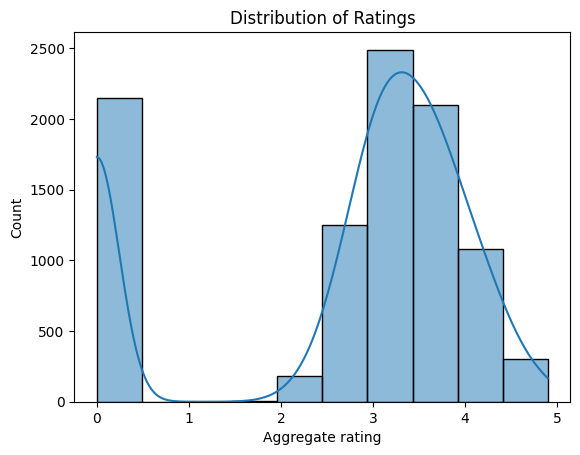

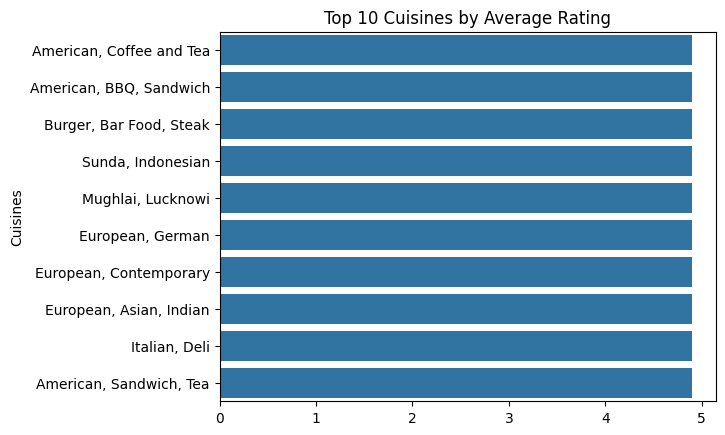

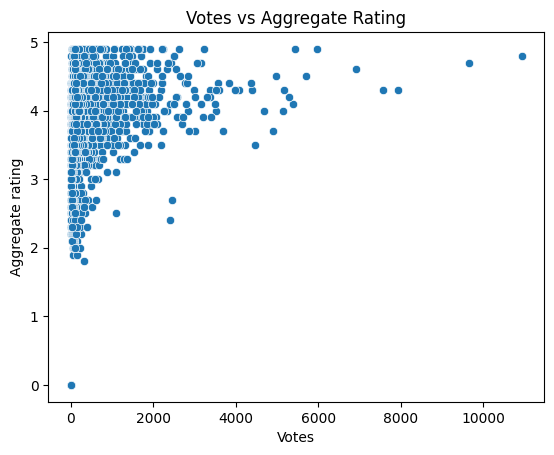

<Figure size 640x480 with 0 Axes>

In [13]:
# Distribution of Ratings
sns.histplot(data['Aggregate rating'], bins=10, kde=True)
plt.title("Distribution of Ratings")
plt.show()

# Average Ratings by Cuisines
avg_rating_cuisine = data.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_rating_cuisine.values, y=avg_rating_cuisine.index)
plt.title("Top 10 Cuisines by Average Rating")
plt.show()

# Relationship Between Features and Ratings
sns.scatterplot(x=data['Votes'], y=data['Aggregate rating'])
plt.title("Votes vs Aggregate Rating")
plt.show()
plt.savefig('visualizations')